In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import pyqosc as qo
import scipy as sp

options = qt.Options(nsteps = int(1e9))
plt.rcParams.update({"font.size" : 13})

In [38]:
def sim(N, n):

    fig, ax = plt.subplots(1,1, figsize = (10,5))

    vdp = qo.vdp(N = N, omega = 1.1)
    Ham, c_ops = vdp.dynamics()
    rho_ss = qt.steadystate(Ham, c_ops)

    out_lst = []
    theta_lst = np.linspace(0, 2*np.pi, 37)[:-1]
    for theta in theta_lst:
        out_lst.append(qo.qdistance_to_ss(Ham = Ham,
                        c_ops = c_ops,
                        rho0 = qt.coherent_dm(N, n * np.exp(1j*theta)),
                        timelst = np.linspace(0, 25, 51),
                        dist_func = qt.tracedist,
                        steadystate = rho_ss,
                        plot = False,
                        overlap_with = ax)[1])
    ax.scatter(theta_lst, out_lst, c = "b", label = "coherent")
    ax.set_xticks([0, np.pi, 2*np.pi])
    ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"])
    ax.set_xlabel(r"complex plane angle for $\alpha$")
    ax.set_ylabel(r"time to reach steady state")

    rho_0_lst = [qt.thermal_dm(N, n),
                qt.fock_dm(N, n)]
    color = ["g", "r"]
    label = ["thermal", "number"]
    ls = [":", "--"]
    for i in [0,1]:
        x = qo.qdistance_to_ss(Ham = Ham,
                        c_ops = c_ops,
                        rho0 = rho_0_lst[i],
                        timelst = np.linspace(0, 25, 51),
                        dist_func = qt.tracedist,
                        steadystate = rho_ss,
                        plot = False,
                        overlap_with = ax)[1]
        ax.axhline(x, c = color[i], label = label[i], ls = ls[i])
        
    fig.suptitle(f"average photon number = {n}")
    print("blue dots --> coherent states with alpha = n * exp(1j * angle) \ngreen dotted line --> thermal state with n = n, \nred dashed line --> number state with n = n")
    plt.show()

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


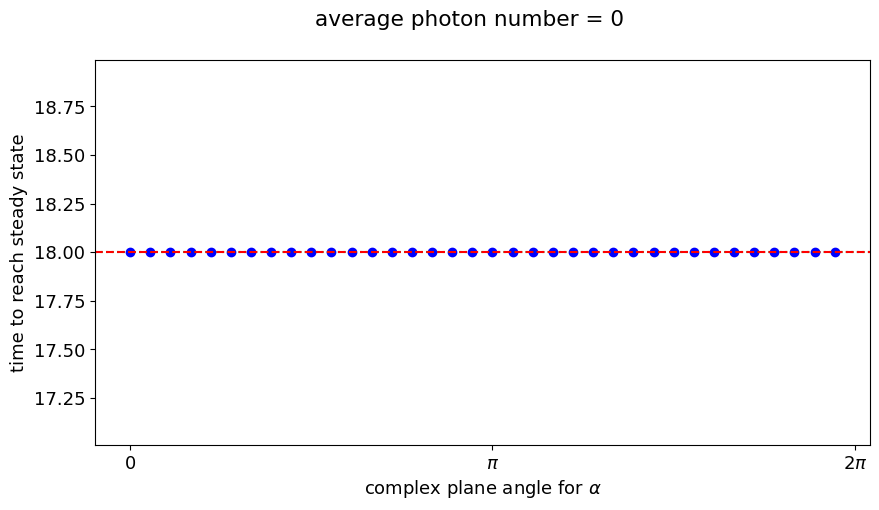

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


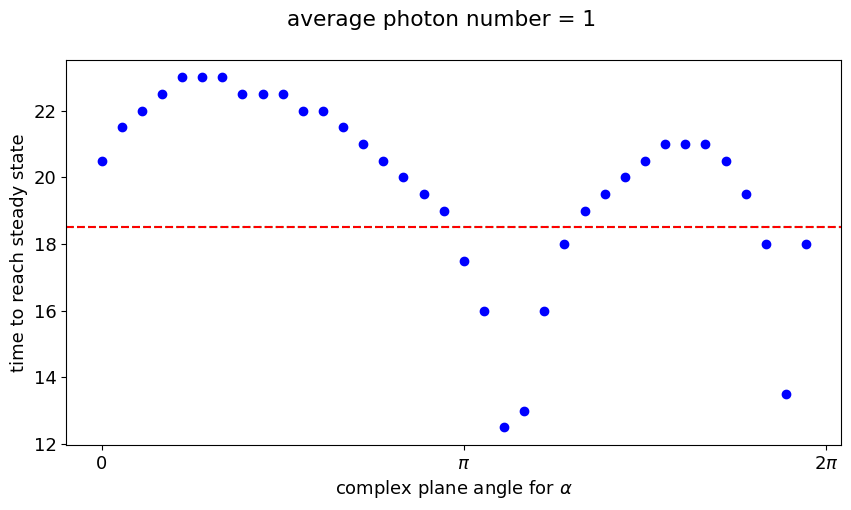

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


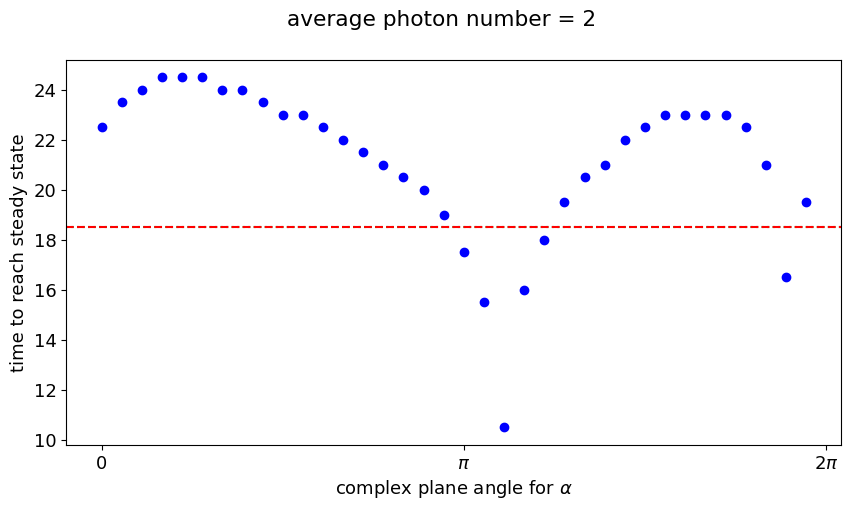

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


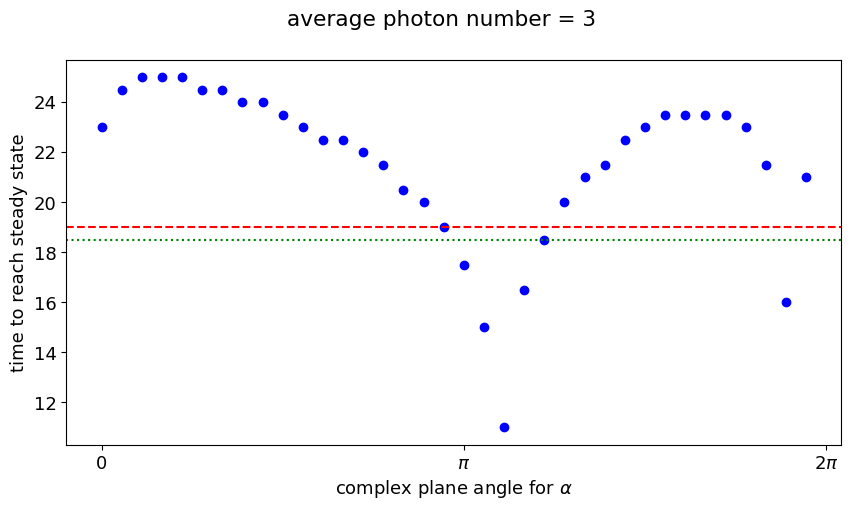

In [41]:
N = 20
for n in range(4):
    sim(N, n)

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


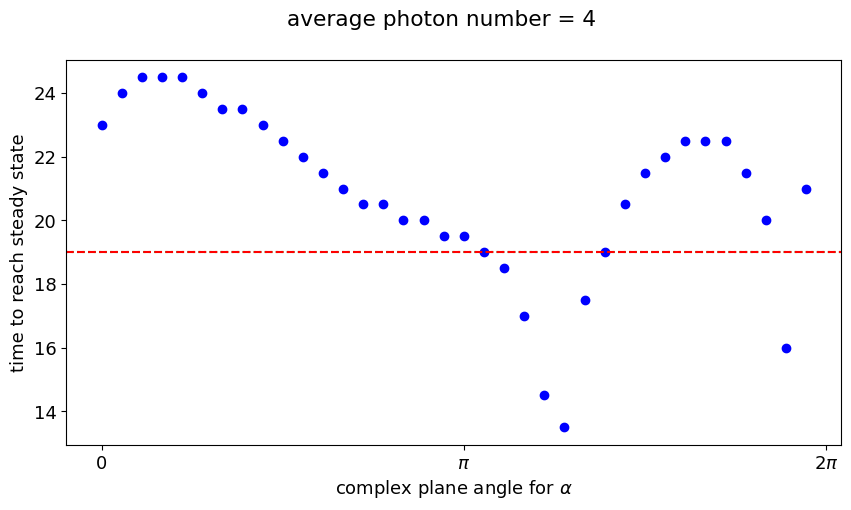

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


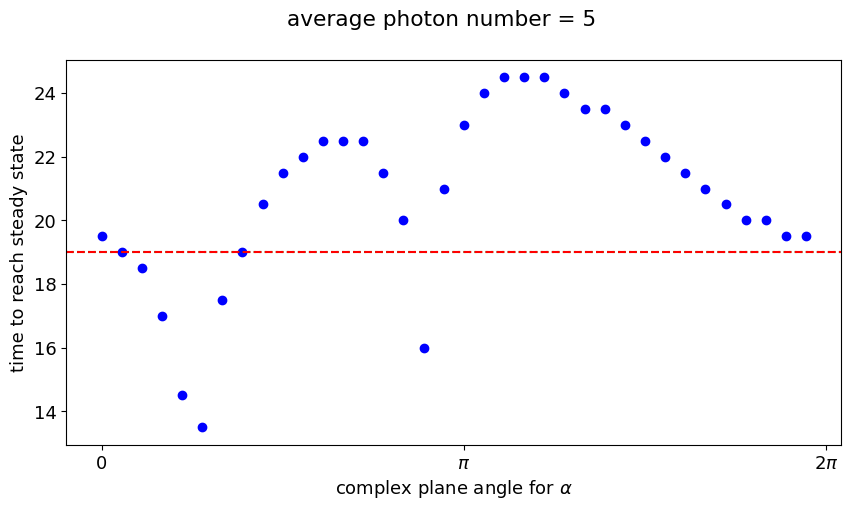

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


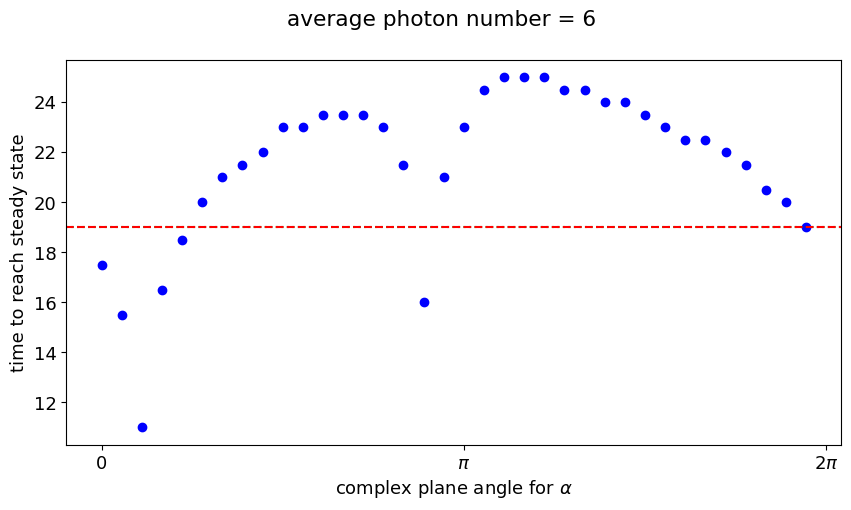

blue dots --> coherent states with alpha = n * exp(1j * angle) 
green dotted line --> thermal state with n = n, 
red dashed line --> number state with n = n


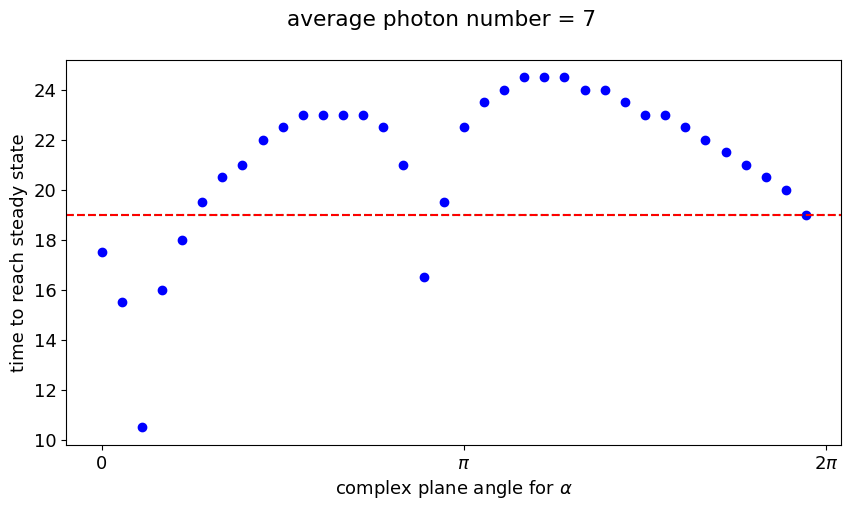

KeyboardInterrupt: 

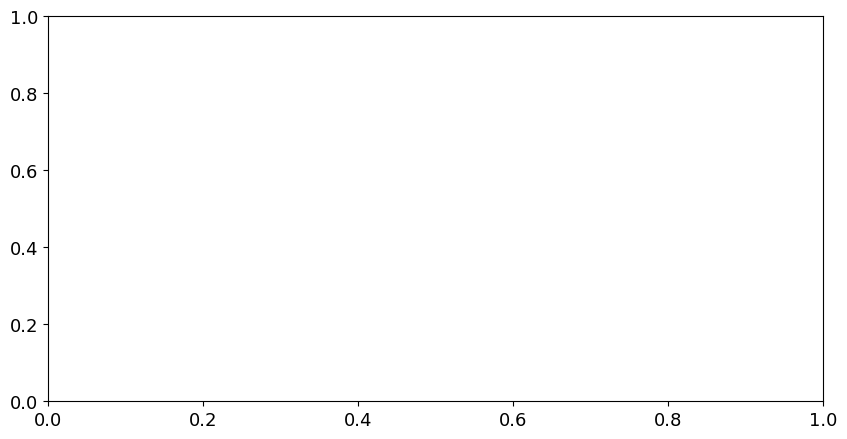

In [42]:
N = 20
for n in range(4,11):
    sim(N, n)